## 1. Exploração dos Dados
Nesta etapa, vamos analisar o conjunto de dados, visualizar distribuições e calcular estatísticas descritivas.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub

# Baixar o dataset do Kaggle
path = kagglehub.dataset_download("spscientist/students-performance-in-exams")
print("Path to dataset files:", path)

# Carregar o arquivo CSV
csv_path = path + "/StudentsPerformance.csv"
df = pd.read_csv(csv_path)
df.head()

Path to dataset files: C:\Users\ediad\.cache\kagglehub\datasets\spscientist\students-performance-in-exams\versions\1


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
# 04. Análise Exploratória
import os
os.makedirs('imagens', exist_ok=True)
desc_stats = df.describe(include='all')
desc_stats.to_csv('imagens/analise_exploratoria.csv')
desc_stats

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000


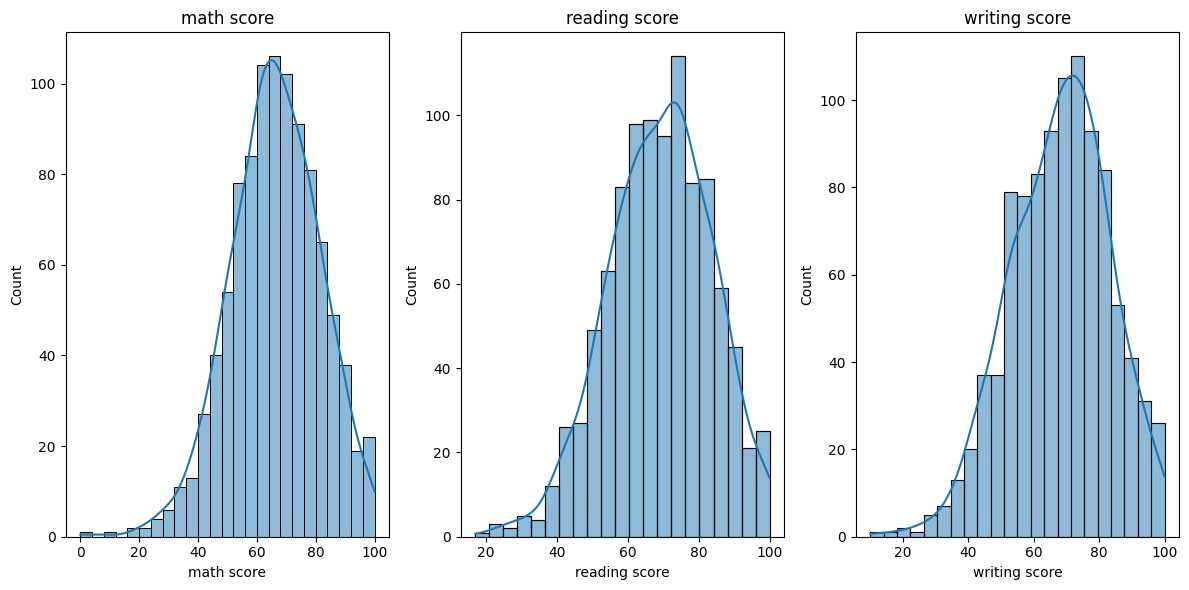

In [4]:
# 05. Visualização das Notas
import os
os.makedirs('imagens', exist_ok=True)
plt.figure(figsize=(12,6))
for i, col in enumerate(["math score", "reading score", "writing score"]):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.savefig('imagens/visualizacao_notas.png', format='png')
plt.show()

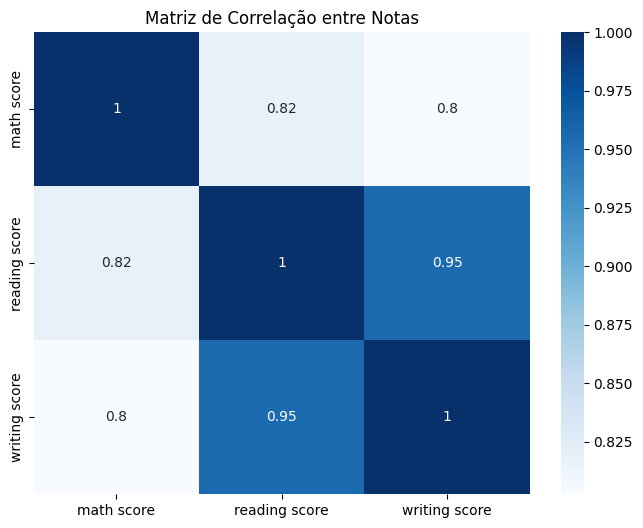

In [5]:
# 06. Correlação entre Variáveis
import os
os.makedirs('imagens', exist_ok=True)
plt.figure(figsize=(8,6))
sns.heatmap(df[["math score", "reading score", "writing score"]].corr(), annot=True, cmap='Blues')
plt.title('Matriz de Correlação entre Notas')
plt.savefig('imagens/correlacao_notas.png', format='png')
plt.show()

## 07. Comparação de Grupos
Aqui você pode comparar grupos, por exemplo, por gênero ou tipo de preparação.

Exemplo:
```python
sns.boxplot(x='gender', y='math score', data=df)
plt.title('Comparação de Notas por Gênero')
plt.show()
```

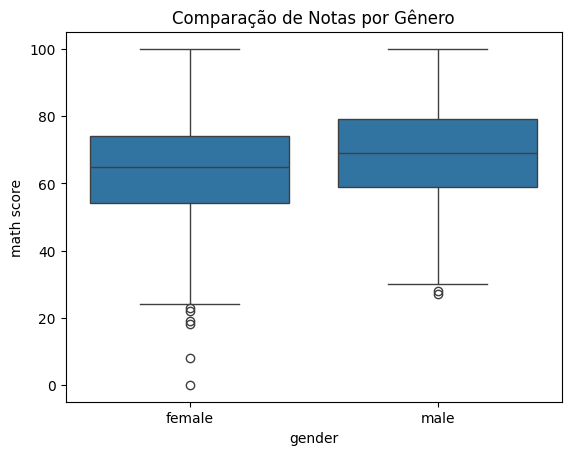

In [6]:
# 07. Comparação de Grupos - Gráfico Boxplot por Gênero
import os
os.makedirs('imagens', exist_ok=True)
sns.boxplot(x='gender', y='math score', data=df)
plt.title('Comparação de Notas por Gênero')
plt.savefig('imagens/comparacao_grupos.png', format='png')
plt.show()

In [7]:
# 08. Pré-processamento
import os
os.makedirs('imagens', exist_ok=True)
missing = df.isnull().sum()
missing.to_csv('imagens/valores_ausentes.csv')
missing

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [8]:
# Preenchimento de valores ausentes (se houver) apenas nas colunas numéricas
for col in ["math score", "reading score", "writing score"]:
    df[col] = df[col].fillna(df[col].mean())

In [9]:
# Normalização das notas
import os
os.makedirs('imagens', exist_ok=True)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[["math score", "reading score", "writing score"]] = scaler.fit_transform(df[["math score", "reading score", "writing score"]])
df.head().to_csv('imagens/dados_normalizados.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,0.72,0.662651,0.711111
1,female,group C,some college,standard,completed,0.69,0.879518,0.866667
2,female,group B,master's degree,standard,none,0.90,0.939759,0.922222
3,male,group A,associate's degree,free/reduced,none,0.47,0.481928,0.377778
4,male,group C,some college,standard,none,0.76,0.734940,0.722222


## 3. Divisão dos Dados
Agora vamos separar o conjunto de dados em treino e teste para avaliar o desempenho do modelo.

In [10]:
# 09. Divisão Treino/Teste
import os
os.makedirs('imagens', exist_ok=True)
target = "math score"
features = [col for col in df.columns if col not in [target]]

X = pd.get_dummies(df[features], drop_first=True)
y = df[target]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pd.DataFrame(X_train).to_csv('imagens/X_train.csv')
pd.DataFrame(X_test).to_csv('imagens/X_test.csv')
pd.DataFrame(y_train).to_csv('imagens/y_train.csv')
pd.DataFrame(y_test).to_csv('imagens/y_test.csv')

## 10. Treinamento do Modelo
Agora vamos treinar o modelo Random Forest com os dados de treino.

In [11]:
# Treinamento do Random Forest
import os
os.makedirs('imagens', exist_ok=True)
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train, y_train)
import joblib
joblib.dump(rf, 'imagens/modelo_random_forest.png')

['imagens/modelo_random_forest.png']

## 11. Avaliação do Modelo
Avalie o desempenho do modelo usando métricas apropriadas.


In [12]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
with open('imagens/avaliacao_modelo.txt', 'w') as f:
    f.write(f'MSE: {mse}\nR²: {r2}')
print('MSE:', mse)
print('R²:', r2)

MSE: 0.0034670033821955553
R²: 0.8575233755874307


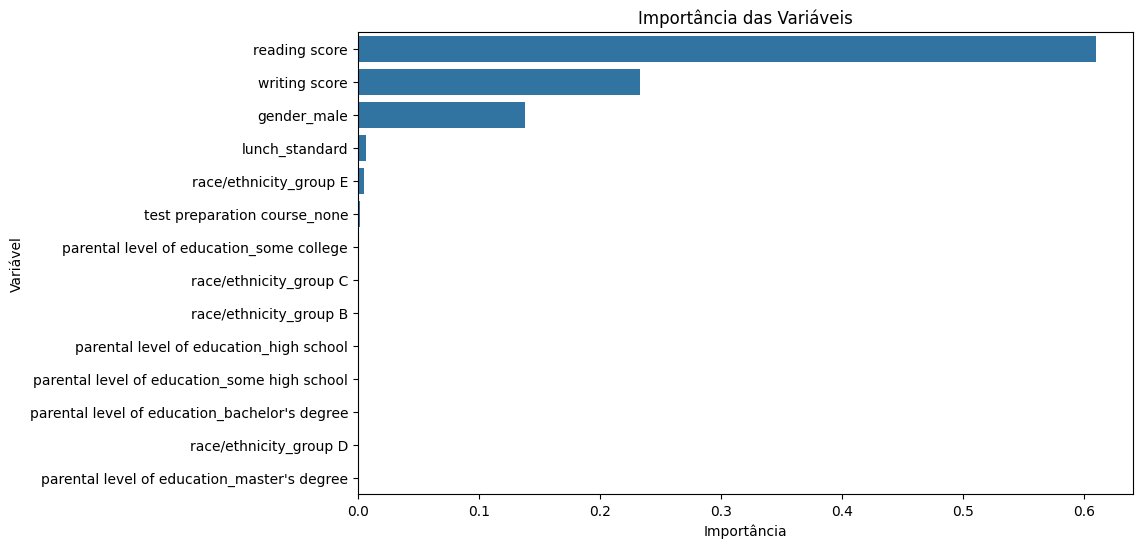

In [13]:
# 12. Importância das Variáveis
import os
os.makedirs('imagens', exist_ok=True)
importances = rf.feature_importances_
feat_names = X.columns
feat_imp = pd.Series(importances, index=feat_names).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp, y=feat_imp.index)
plt.title('Importância das Variáveis')
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.savefig('imagens/importancia_variaveis.png', format='png')
plt.show()